In [1]:
import sys
sys.path.append('/home/dawna/tts/qd212/lib_QDOU/')
from IO_wav_lab import *
from CMD_bash import *

file_list = get_file_list('/home/dawna/tts/qd212/data/lj/merlinData/file_id_list.scp')

import numpy
np = numpy

import matplotlib.pyplot as plt
import os
import cPickle as pickle

import random

def readLab(dirFile,dim_lab=163):
    data = numpy.fromfile(dirFile, dtype='float32')
    data = data.reshape((data.shape[0]/dim_lab),dim_lab)
    return data

def checkDim(pml,idx_dim,lim_x=[]):
    pml = pml.transpose()
    plt.plot(pml[:,idx_dim])
    if lim_x: plt.xlim(lim_x)
    plt.show()
    
def compareDim(pml,pml_ref,idx_dim,lim_x=[]):
    pml = pml.transpose()
    pml_ref = pml_ref.transpose()
    plt.plot(pml_ref[:,idx_dim],label='ref')
    plt.plot(pml[:,idx_dim],label='gen')
    if lim_x: plt.xlim(lim_x)
    plt.legend()
    plt.show()

def compareDim_list_2d(pml_list,label_list,idx_dim,lim_x=[]):
    pml_list = [p.transpose() for p in pml_list]
    for p,l in zip(pml_list,label_list):
        plt.plot(p[:,idx_dim],label=l)
    if lim_x: plt.xlim(lim_x)
    plt.legend()
    plt.show()
    
def compareDim_list_3d(pml_list,label_list,idx_dim,idx_row=0,lim_x=[]):
    pml_list = [p.transpose() for p in pml_list]
    for p,l in zip(pml_list,label_list):
        plt.plot(p[idx_row,:,idx_dim],label=l)
    if lim_x: plt.xlim(lim_x)
    plt.legend()
    plt.show()
    
def get_rmse(targets, predictions):
    return np.sqrt(np.mean((predictions-targets)**2))

def get_rmse_lst_exp(ref_dir, exp_dir):
    n_lst = os.listdir(ref_dir)
    ref_dirFile_lst = [os.path.join(ref_dir, n) for n in n_lst]
    exp_dirFile_lst = [os.path.join(exp_dir, n) for n in n_lst]
    rmse_lst = [get_rmse(np.load(r), np.load(e)) for (r,e) in zip(ref_dirFile_lst, exp_dirFile_lst)]
    return rmse_lst

def plot_attention(attn, path=None):
    fig = plt.figure(figsize=(12, 6))
    plt.imshow(attn.T, interpolation='nearest', aspect='auto')
    plt.show()
#     if path is not None:
#         fig.savefig(path.parent/f'{path.stem}.png', bbox_inches='tight')
#         plt.close(fig)

rm ckpts

In [3]:
def getStep(ckpt):
    return int(ckpt.split('step')[1].split('K')[0])

def clean_exp_ckpts(dir_exp, ckptSet=None, gap=10, flag_doit=False):
    # get ckpts to keep
    dirSet = os.path.join(dir_exp, ckptSet) if ckptSet else dir_exp
    ckpt_lst = [c for c in os.listdir(dirSet) if 'step' in c]
    lst_ckpts_to_keep = [c for c in ckpt_lst if getStep(c)%gap==0]
    lst_ckpts_to_rm = [c for c in ckpt_lst if c not in lst_ckpts_to_keep]
#     print(sorted(lst_ckpts_to_rm))
    
    # rm the rest
    for c in sorted(lst_ckpts_to_rm):
        dir_ckpt = os.path.join(dirSet, c)
        if os.path.isfile(dir_ckpt):
            if flag_doit:
                print('removing: {}').format(dir_ckpt)
                os.remove(dir_ckpt)
            else:
                print('to be removed: {}').format(dir_ckpt)

In [3]:
dir_base = '/home/dawna/tts/qd212/models/WaveRNN/checkpoints/'
lst_dir_exp = [os.path.join(dir_base, e) for e in os.listdir(dir_base) if 'lsa_smooth_attention.tacotron' in e]
ckptSet = None
gap = 50
flag_doit = False
# flag_doit = True

for dir_exp in lst_dir_exp:
    print(dir_exp)
    clean_exp_ckpts(dir_exp, ckptSet, gap=gap, flag_doit=flag_doit)

/home/dawna/tts/qd212/models/WaveRNN/checkpoints/ljspeech_lsa_smooth_attention.tacotron


In [24]:
dir_base = '/home/dawna/tts/qd212/models/WaveRNN/checkpoints/'
# lst_dir_exp = [os.path.join(dir_base, e) for e in os.listdir(dir_base) if 'mp_lj_pass2_BS' in e and 'D4' in e]
lst_dir_exp = [os.path.join(dir_base, e) for e in os.listdir(dir_base) if 'mp_lj_pass2_BS' in e]
ckptSet = 'pass2'
gap = 10
flag_doit = False
# flag_doit = True

for dir_exp in lst_dir_exp:
    print(dir_exp)
    clean_exp_ckpts(dir_exp, ckptSet, gap=gap, flag_doit=flag_doit)

/home/dawna/tts/qd212/models/WaveRNN/checkpoints/mp_lj_pass2_BS16a4_p1fr_re4_masker.tacotron
to be removed: /home/dawna/tts/qd212/models/WaveRNN/checkpoints/mp_lj_pass2_BS16a4_p1fr_re4_masker.tacotron/pass2/taco_step16K_optim.pyt
to be removed: /home/dawna/tts/qd212/models/WaveRNN/checkpoints/mp_lj_pass2_BS16a4_p1fr_re4_masker.tacotron/pass2/taco_step16K_weights.pyt
to be removed: /home/dawna/tts/qd212/models/WaveRNN/checkpoints/mp_lj_pass2_BS16a4_p1fr_re4_masker.tacotron/pass2/taco_step24K_optim.pyt
to be removed: /home/dawna/tts/qd212/models/WaveRNN/checkpoints/mp_lj_pass2_BS16a4_p1fr_re4_masker.tacotron/pass2/taco_step24K_weights.pyt
to be removed: /home/dawna/tts/qd212/models/WaveRNN/checkpoints/mp_lj_pass2_BS16a4_p1fr_re4_masker.tacotron/pass2/taco_step32K_optim.pyt
to be removed: /home/dawna/tts/qd212/models/WaveRNN/checkpoints/mp_lj_pass2_BS16a4_p1fr_re4_masker.tacotron/pass2/taco_step32K_weights.pyt
to be removed: /home/dawna/tts/qd212/models/WaveRNN/checkpoints/mp_lj_pass2_BS1

GV

In [41]:
# prepare test txt seqs
# read
csv_file = '/home/dawna/tts/qd212/data/lj/webData/metadata.csv'
name_lst, txt_lst = [], []
with open(csv_file) as f :
    for line in f :
        split = line.split('|')
        name_lst.append(split[0])
        txt_lst.append(split[-1])
txt_lst = txt_lst[-250:]

# write last 250 to file
with open('/home/dawna/tts/qd212/models/WaveRNN/test_sentences/sentences_espnet_all250.txt', 'w') as f:
    for txt in txt_lst:
        f.write(txt)

In [2]:
def get_gv(data):
    gv_dim_lst = [np.var(d) for d in data]
#     print(len(gv_dim_lst))
    return np.mean(gv_dim_lst)

def check_gv_set(dirFile_lst, flag_show=False):
    gv_lst = []
    for d in dirFile_lst:
        data = np.load(d)
    #     print(data.shape)
        gv = get_gv(data)
        gv_lst.append(gv)
    
    if flag_show:
        m, v = np.mean(gv_lst), np.var(gv_lst)
        print(m, v)
        plt.plot(sorted(gv_lst))
        plt.show()
        
    return gv_lst

def compare_gv_sets(gv_lst, gv_arr_lst, label_lst):
    """
    input
        gv_lst - ref gv_lst, equivalent to gv_arr
        label_lst - list of labels, one for each exp
        gv_arr_lst - list of gv_arrs, one for each exp
    output
        print mean gv for ref and each exp
        plot sorted gv_lst / gv_arr to see more details
    """
    gv_arr_lst = [np.load(g) for g in gv_arr_lst]
    print('ref', np.mean(gv_lst))
    plt.plot(sorted(gv_lst), label='ref')
    for g, l in zip(gv_arr_lst, label_lst):
        print(l, np.mean(g))
        plt.plot(sorted(g), label=l)
    plt.legend()
    plt.ylim([0, 0.05])
    plt.show()

(0.023644675, 5.4102156e-06)


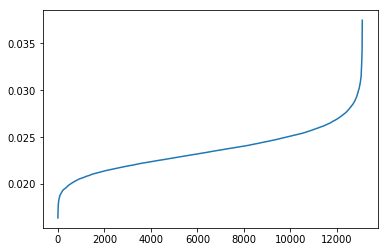

13100


In [23]:
# mel_ref_dir = '/home/dawna/tts/qd212/models/WaveRNN/data/mel/'
# dirFile_lst = [os.path.join(mel_ref_dir, f) for f in os.listdir(mel_ref_dir)]
# gv_lst = check_gv_set(dirFile_lst, flag_show=True)
# print(len(gv_lst))

(0.023539279, 3.6155122e-06)


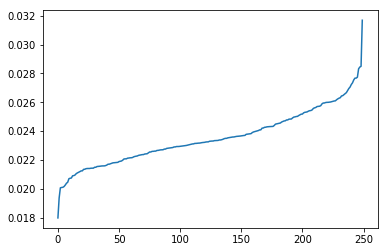

250


In [4]:
mel_ref_dir = '/home/dawna/tts/qd212/models/WaveRNN/data/mel/'
dirFile_lst = [os.path.join(mel_ref_dir, f) for f in os.listdir(mel_ref_dir)]
dirFile_lst = sorted(dirFile_lst)[-250:]
gv_lst = check_gv_set(dirFile_lst, flag_show=True)
print(len(gv_lst))

(0.022722173, 8.4333431e-07)


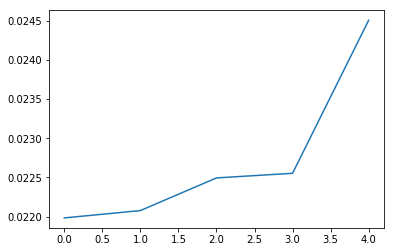

5


In [54]:
# mel_ref_dir = '/home/dawna/tts/qd212/models/WaveRNN/data/mel/'
# dirFile_lst = [os.path.join(mel_ref_dir, f) for f in os.listdir(mel_ref_dir)]
# dirFile_lst = sorted(dirFile_lst)[-250:-250+5]
# gv_lst = check_gv_set(dirFile_lst, flag_show=True)
# print(len(gv_lst))

('ref', 0.023539279)
('ss0.3', 0.015909877)
('ss0.2', 0.014806876)


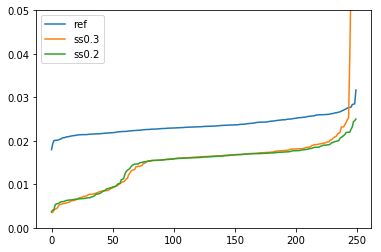

In [5]:
label_lst = ['ss0.3', 'ss0.2']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_ss0.3_pretrainGold_bs100_stepD1.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_ss0.2_pretrainGold_bs100_stepD4.tacotron/gv_array.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS32', 0.015105382)
('tfBS64', 0.015655214)
('tfBS100', 0.01627201)


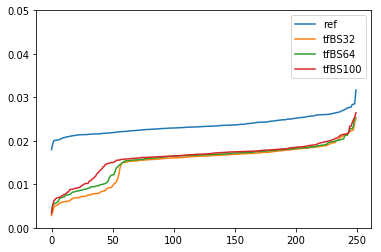

In [10]:
label_lst = ['tfBS32', 'tfBS64', 'tfBS100']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs64.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs100.tacotron/gv_array.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('afBS32', 0.01955816)
('afBS64', 0.020786608)
('afBS100', 0.026033306)


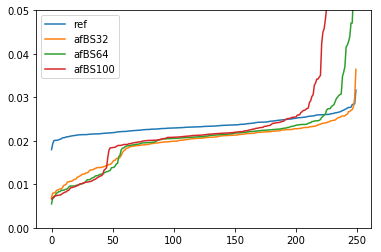

In [6]:
label_lst = ['afBS32', 'afBS64', 'afBS100']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_af_online_kl1.0_bs32.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_af_online_kl1.0_bs64.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_af_online_kl1.0_bs100.tacotron/gv_array.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS100', 0.01627201)
('afBS100', 0.026033306)


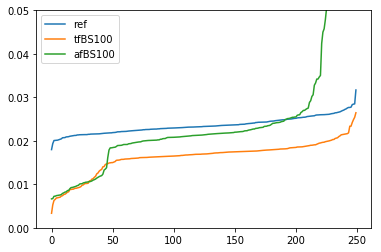

In [11]:
label_lst = ['tfBS100', 'afBS100']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs100.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_af_online_kl1.0_bs100.tacotron/gv_array.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS100', 0.01627201)
('tf-p2-xNy1', 0.015604747)
('tf-p2-xAOy1', 0.015399418)


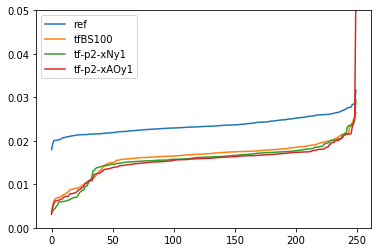

In [7]:
label_lst = ['tfBS100', 'tf-p2-xNy1', 'tf-p2-xAOy1']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs100.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_BS16a8_p1fr_re4_xNy1.tacotron/xNy1/gv_p2_array.npy',
              '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_BS16a8_p1fr_re4_x_y1_xNy1.tacotron/xNy1/gv_p2_array.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS100', 0.01627201)
('tf-p2-y1', 0.012648848)
('tf-p2-y1s1', 0.011343394)
('tf-p2-xAOy1s1', 0.015822032)


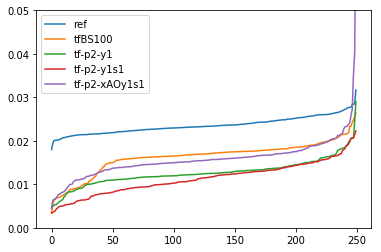

In [8]:
label_lst = ['tfBS100', 'tf-p2-y1', 'tf-p2-y1s1', 'tf-p2-xAOy1s1']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs100.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_fixBestP1_BS100_stepD10_p1fr_re4_y1.tacotron/y1/gv_p2_array.npy',
              '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_fixBestP1_BS100_stepD10_p1fr_re4_y1s1.tacotron/y1s1/gv_p2_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_fixBestP1_BS100_stepD5_p1fr_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS32', 0.015105382)
('tf-p2-y1', 0.010496449)
('tf-p2-xAOy1s1', 0.013348823)


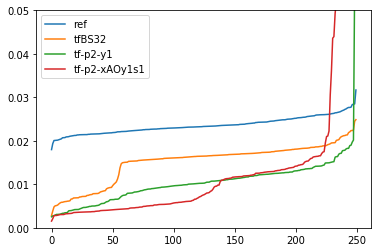

In [5]:
label_lst = ['tfBS32', 'tf-p2-y1', 'tf-p2-xAOy1s1']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_BS32_stepD2_max80k_p1fr_frL1.2_re4_y1.tacotron/y1/gv_p2_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_BS32_stepD1_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS32', 0.015105382)
('tf-p2-xAOy1s1-BS128-194k', 0.014417641)
('tf-p2-xAOy1s1-BS128-320k', 0.01330763)


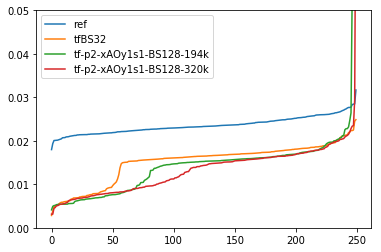

In [4]:
label_lst = ['tfBS32', 'tf-p2-xAOy1s1-BS128-194k', 'tf-p2-xAOy1s1-BS128-320k']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_BS128_stepD4_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_194k.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_BS128_stepD4_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_320k.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS32', 0.015105382)
('tf-p2-xAOy1-GAL10-32k', 0.014799097)
('tf-p2-xAOy1-GAL10', 0.014719332)
('tf-p2-xAOy1-GAL100', 0.014064348)


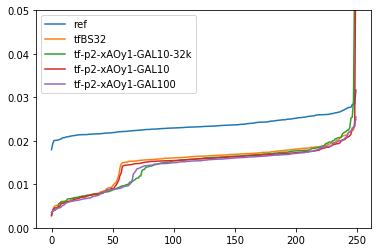

In [6]:
label_lst = ['tfBS32', 'tf-p2-xAOy1-GAL10', 'tf-p2-xAOy1-GAL10-32k', 'tf-p2-xAOy1-GAL100']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL10.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array.npy',
              '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL10.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_32k.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL100.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS32', 0.015105382)
('tf-p2-xAOy1-GAL100-4k', 0.015584004)
('tf-p2-xAOy1-GAL100-20k', 0.014851243)
('tf-p2-xAOy1-GAL100-40k', 0.01382067)


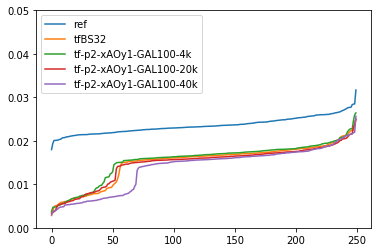

In [8]:
label_lst = ['tfBS32', 'tf-p2-xAOy1-GAL100-4k', 'tf-p2-xAOy1-GAL100-20k', 'tf-p2-xAOy1-GAL100-40k']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL100.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_4k.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL100.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_20k.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL100.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_40k.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS32', 0.015105382)
('tf-p2-xAOy1-GAL100-4k', 0.015584004)
('tf-p2-xAOy1-GAL100-8k', 0.014630827)
('tf-p2-xAOy1-GAL100-12k', 0.014636133)
('tf-p2-xAOy1-GAL100-16k', 0.014775289)
('tf-p2-xAOy1-GAL100-20k', 0.014851243)
('tf-p2-xAOy1-GAL100-24k', 0.013883549)
('tf-p2-xAOy1-GAL100-40k', 0.01382067)


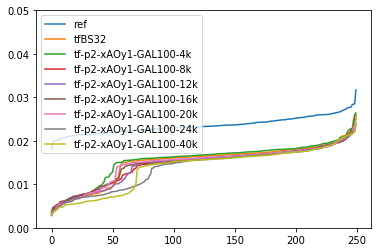

In [14]:
label_lst = ['tfBS32'] + ['tf-p2-xAOy1-GAL100-{}k'.format(k) for k in [4,8,12,16,20,24,40]]
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/gv_array.npy']
gv_arr_lst += ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL100.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_{}k.npy'.format(k) for k in [4,8,12,16,20,24,40]]
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS32', 0.015105382)
('tf-p2-xAOy1-GAL10-8k', 0.014765272)
('tf-p2-xAOy1-GAL10-12k', 0.015948171)
('tf-p2-xAOy1-GAL10-16k', 0.014676423)
('tf-p2-xAOy1-GAL10-32k', 0.014719332)


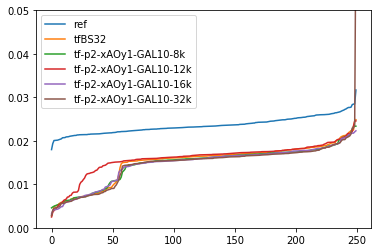

In [12]:
label_lst = ['tfBS32', 'tf-p2-xAOy1-GAL10-8k', 'tf-p2-xAOy1-GAL10-12k', 'tf-p2-xAOy1-GAL10-16k', 'tf-p2-xAOy1-GAL10-32k']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL10.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_8k.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL10.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_12k.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL10.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_16k.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL10.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_32k.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

('ref', 0.023539279)
('tfBS32', 0.015105382)
('tf-p2-xAOy1-GAL10-36k', 0.014228521)
('tf-p2-xAOy1-GAL100-56k', 0.014762034)
('tf-p2-xAOy1-GAL100-64k', 0.014501051)


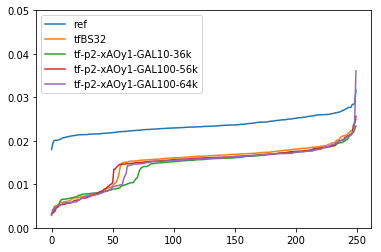

In [11]:
label_lst = ['tfBS32', 'tf-p2-xAOy1-GAL10-36k', 'tf-p2-xAOy1-GAL100-56k', 'tf-p2-xAOy1-GAL100-64k']
gv_arr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/gv_array.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL10.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_36k.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL10.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_56k.npy',
             '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/mp_lj_pass2_nomask_fixBestP1_GAL10.0_BS32_stepD2_max80k_p1fr_frL1.2_re4_xAOy1s1.tacotron/xNy1s1/gv_p2_array_64k.npy']
compare_gv_sets(gv_lst, gv_arr_lst, label_lst)

In [22]:
# for name in ['LJ001-0012','LJ001-0097','LJ040-0162']:
#     dirFile = '/home/dawna/tts/qd212/models/WaveRNN/data/mel/{}.npy'.format(name)
#     attn_ref = np.load(dirFile)
#     print(attn_ref.shape)

name_lst = ['LJ050-0029', 'LJ050-0030', 'LJ050-0031', 'LJ050-0032', 'LJ050-0033']
dirFile_ref = '/home/dawna/tts/qd212/data/lj/webData/wavs/{}.wav'
dirFile_fr_lst = ['/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold.tacotron/{}_gen.wav',
                 '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs100.tacotron/{}_gen.wav',
                 '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/{}_gen.wav']

for dirFile_fr in dirFile_fr_lst:
    print(dirFile_fr)
    for name in name_lst:
        r_ref = readWav(dirFile_ref.format(name)).shape[-1]
        r_fr = readWav(dirFile_fr.format(name)).shape[-1]
        print(float(r_fr)/r_ref)

/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold.tacotron/{}_gen.wav
0.82487613681
0.927542043069
2.53043798476
0.789131312919
0.836181390508
/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs100.tacotron/{}_gen.wav
0.840688458922
0.940514659056
0.80128426431
0.75450763557
0.831673674117
/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_pretrainGold_bs32.tacotron/{}_gen.wav
0.840688458922
0.914569427082
2.53043798476
0.786246006474
0.827165957726


(332, 148)


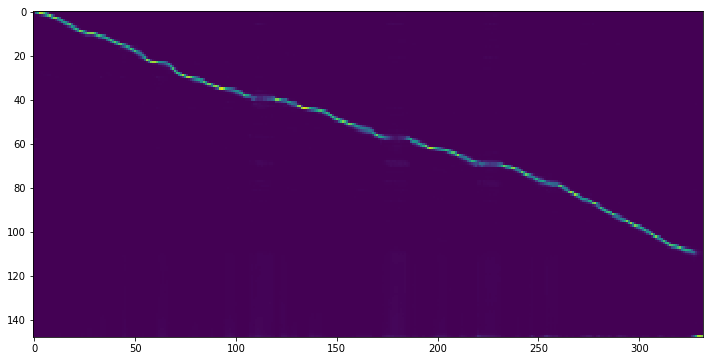

(332, 149)


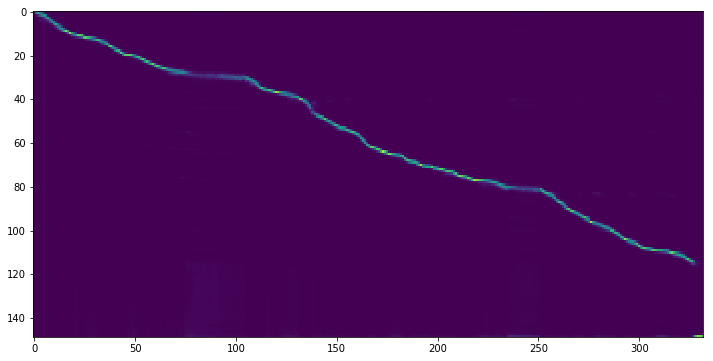

(332, 148)


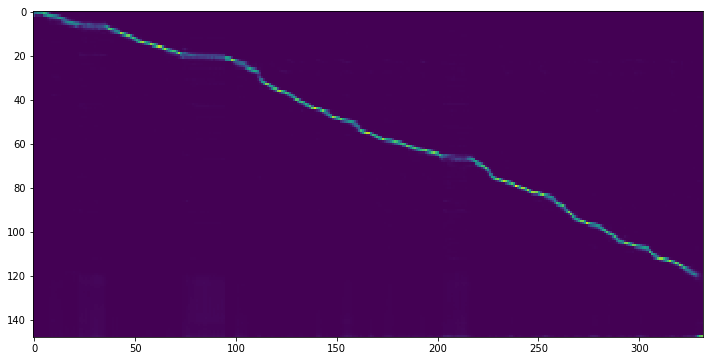

In [20]:
for name in ['LJ001-0012','LJ001-0097','LJ040-0162']:
    dirFile = '/home/dawna/tts/qd212/models/WaveRNN/data/attn_lj_gold/{}.npy'.format(name)
    attn_ref = np.load(dirFile)
    print(attn_ref.shape)
    plot_attention(attn_ref, path=None)

In [35]:
for idx in range(1,10):
    print(idx)
    print((attn_ref[-idx]>0.1).astype(int))

1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

In [34]:
tmp = attn_ref[:,-2]
print(tmp.shape, (tmp>0.1).astype(int))

tmp = attn_ref[-1,:]
print(tmp.shape, (tmp>0.1).astype(int))

((332,), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
   

(332, 148)
(332, 200)


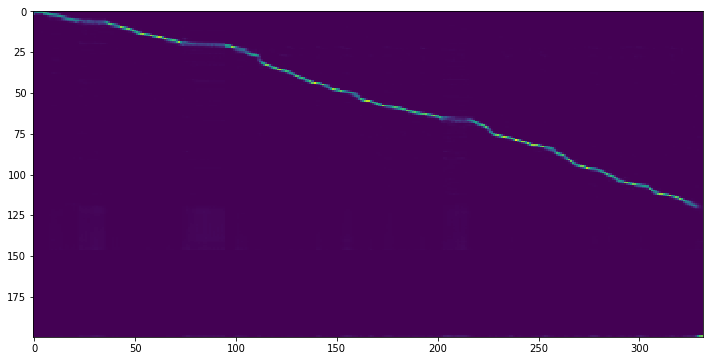

(400, 200)


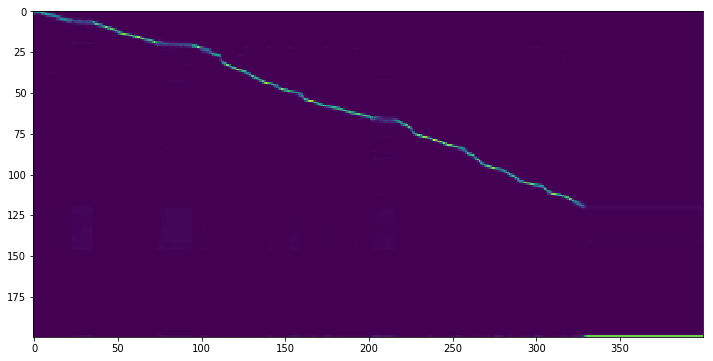

In [70]:
max_x_len = 200
max_spec_len = 400
print(attn_ref.shape)

# tmp = np.zeros([attn_ref.shape[0], max_x_len - attn_ref.shape[1]])
tmp = np.zeros([max_x_len - attn_ref.shape[1], 1])
# print(tmp.shape)
attn_pad = np.insert(attn_ref,-1,tmp,axis = 1)
# attn_pad = np.concatenate([attn_ref[:-1],tmp, attn_ref[-1]],axis = 1)
print(attn_pad.shape)
plot_attention(attn_pad, path=None)

tmp = np.tile(attn_pad[-1,:], (max_spec_len-attn_ref.shape[0],1))
attn_pad = np.concatenate([attn_pad, tmp],axis = 0)
print(attn_pad.shape)
plot_attention(attn_pad, path=None)

('LJ001-0073', (80, 569))
(80, 569) 0.0384928


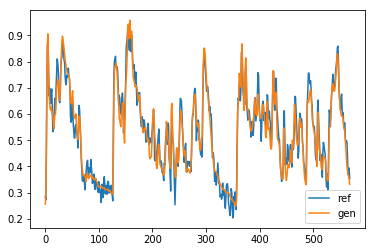

(80, 569) 0.0376112


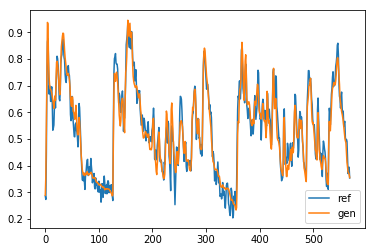

('LJ003-0229', (80, 727))
(80, 727) 0.0371032


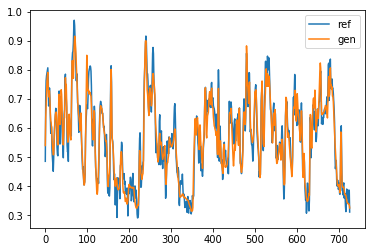

(80, 727) 0.0362775


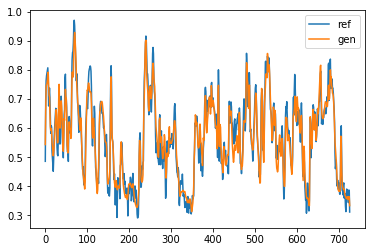

('LJ003-0296', (80, 422))
(80, 422) 0.0387803


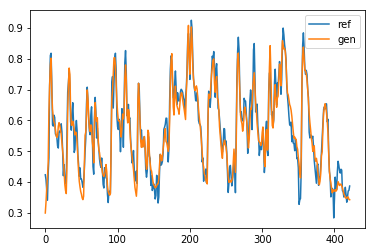

(80, 422) 0.0374324


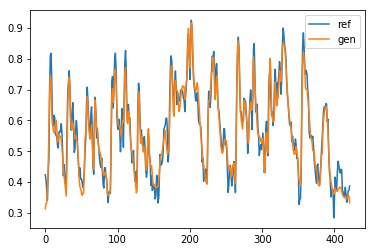

('LJ003-0304', (80, 472))
(80, 472) 0.0383154


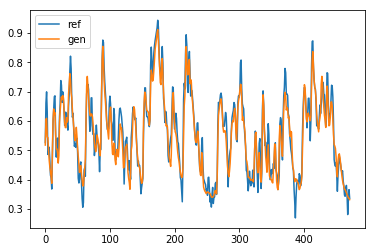

(80, 472) 0.0376855


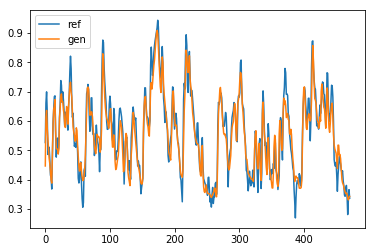

('LJ004-0208', (80, 373))
(80, 373) 0.0392757


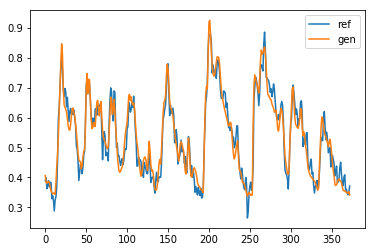

(80, 373) 0.0379909


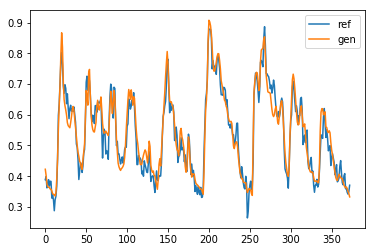

In [20]:
# 202008 check TF/AF mode's performance
idx_dim=30
for name in ['LJ001-0073','LJ003-0229','LJ003-0296','LJ003-0304','LJ004-0208']:
    dirFile = '/home/dawna/tts/qd212/models/WaveRNN/data/mel/{}.npy'.format(name)
    pml_ref = np.load(dirFile)
    print(name, pml_ref.shape)
    
    dirFile = '/home/dawna/tts/qd212/models/WaveRNN/data/gta_lj_pretrainGold/{}.npy'.format(name)
    pml = np.load(dirFile)
    print pml.shape, get_rmse(pml_ref, pml)
    compareDim(pml,pml_ref,idx_dim,lim_x=[])
    
    dirFile = '/home/dawna/tts/qd212/models/WaveRNN/data/gta/{}.npy'.format(name)
    pml = np.load(dirFile)
    print pml.shape, get_rmse(pml_ref, pml)
    compareDim(pml,pml_ref,idx_dim,lim_x=[])

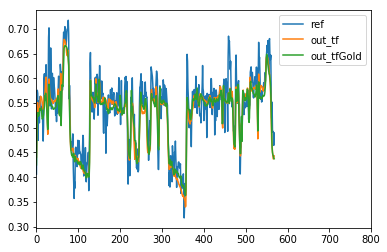

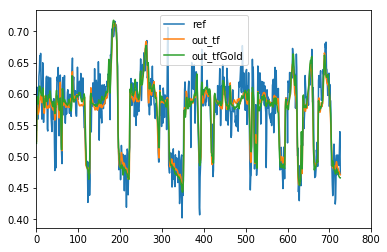

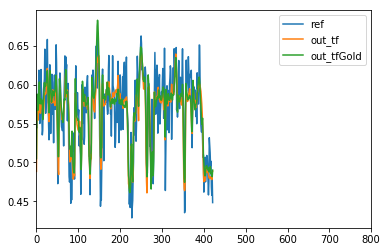

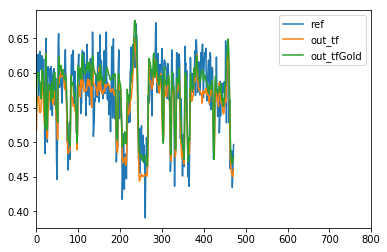

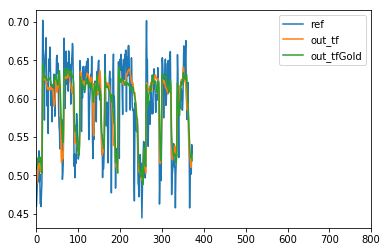

In [18]:
idx_dim=0
label_list = ['ref', 'out_tf', 'out_tfGold']
for name in ['LJ001-0073','LJ003-0229','LJ003-0296','LJ003-0304','LJ004-0208']:
    pml_list = []
    dirFile = '/home/dawna/tts/qd212/models/WaveRNN/data/mel/{}.npy'.format(name)
    pml_list.append(np.load(dirFile))
    dirFile = '/home/dawna/tts/qd212/models/WaveRNN/data/gta/{}.npy'.format(name)
    pml_list.append(np.load(dirFile))
    dirFile = '/home/dawna/tts/qd212/models/WaveRNN/data/gta_lj_pretrainGold/{}.npy'.format(name)
    pml_list.append(np.load(dirFile))
    compareDim_list_2d(pml_list,label_list,idx_dim,lim_x=[0,800])

In [7]:
base_dir = '/home/dawna/tts/qd212/models/WaveRNN/data/'
ref_dir = os.path.join(base_dir, 'mel')

exp_lst = ['gta', 'gta_lj_pretrainGold']
exp_dir_lst = [os.path.join(base_dir, exp) for exp in exp_lst]
for exp_dir in exp_dir_lst:
    rmse_lst = get_rmse_lst_exp(ref_dir, exp_dir)
    print(len(rmse_lst), rmse_lst[:3], np.mean(rmse_lst))

(13100, [0.037516344, 0.040054489, 0.036033511])
0.0373621
(13100, [0.038651578, 0.04137611, 0.037546456])
0.0382649


(80, 569)


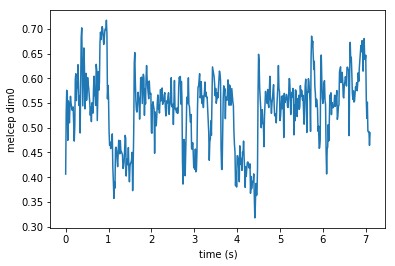

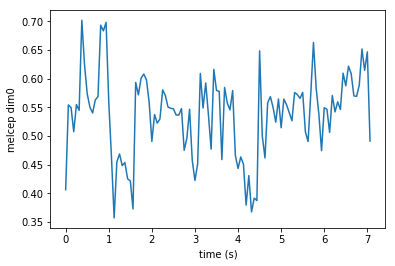

In [21]:
dirFile = '/home/dawna/tts/qd212/models/WaveRNN/data/mel/{}.npy'.format('LJ001-0073')
data = np.load(dirFile)
print(data.shape)
x = np.array(range(data.shape[1])) * 0.0125
plt.plot(x, data[0,:])
plt.xlabel('time (s)'); plt.ylabel('melcep dim0')
# plt.plot(x[::5], data[0,::5], ':')
plt.show()

# plt.plot(x, data[0,:])
plt.plot(x[::5], data[0,::5])
plt.xlabel('time (s)'); plt.ylabel('melcep dim0')
plt.show()

In [3]:
dirFile = '/home/dawna/tts/qd212/data/lj/webData/wavs/{}.wav'.format('LJ001-0073')
data = readWav(dirFile)

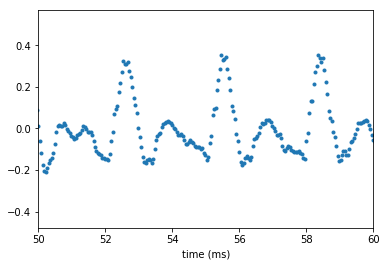

In [27]:
x = np.array(range(data.shape[0])) * 1/22.5
plt.plot(x, data, '.')
plt.xlabel('time (ms)')
plt.xlim([50, 60])
plt.show()

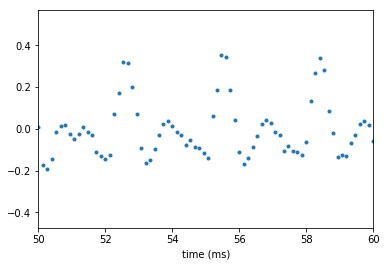

In [29]:
plt.plot(x[::3], data[::3], '.')
plt.xlabel('time (ms)')
plt.xlim([50, 60])
plt.show()

cut wav

In [3]:
from scipy.io.wavfile import write
# import librosa

# prepare test txt seqs
# read
csv_file = '/home/dawna/tts/qd212/data/lj/webData/metadata.csv'
name_lst, txt_lst = [], []
with open(csv_file) as f :
    for line in f :
        split = line.split('|')
        name_lst.append(split[0])
        txt_lst.append(split[-1])
name_lst = name_lst[-250:-150]

In [15]:
base_dir = '/home/dawna/tts/qd212/data/lj/webData/wavs_100/{}.wav'
base_dir_tf = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_pretrainGold_bs100_stepD4.tacotron/goldnv/{}_gen.wav'
base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_af_online_kl1.0_bs100_stepD2.tacotron/goldnv/{}_gen.wav'
nb_attn_fail = {'tf':0, 'af':0}
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_tf = readWav(base_dir_tf.format(f))
    wav_af = readWav(base_dir_af.format(f))
    if len(wav)*1.5<len(wav_tf) or len(wav)*1.5<len(wav_af):
        print(f, len(wav), len(wav_tf), len(wav_af))
    if len(wav)==len(wav_tf) or len(wav)==len(wav_af):
        print('=', f, len(wav), len(wav_tf), len(wav_af))

('=', 'LJ050-0030', 42397, 42397, 42397)
('=', 'LJ050-0033', 122013, 99275, 122013)
('=', 'LJ050-0037', 33949, 34925, 33949)
('=', 'LJ050-0039', 139421, 139421, 139421)
('=', 'LJ050-0048', 116125, 116125, 116125)
('=', 'LJ050-0053', 56733, 56733, 56733)
('=', 'LJ050-0054', 126877, 93775, 126877)
('=', 'LJ050-0062', 138653, 138653, 138653)
('LJ050-0076', 216989, 549725, 549725)
('=', 'LJ050-0078', 174493, 174493, 174493)
('=', 'LJ050-0081', 86941, 86941, 86941)
('LJ050-0083', 159645, 390775, 159645)
('=', 'LJ050-0083', 159645, 390775, 159645)
('LJ050-0087', 201117, 549725, 181225)
('=', 'LJ050-0102', 132509, 132509, 132509)
('=', 'LJ050-0103', 168093, 162525, 168093)
('LJ050-0104', 188573, 314875, 549725)
('LJ050-0105', 161181, 380325, 161181)
('=', 'LJ050-0105', 161181, 380325, 161181)
('=', 'LJ050-0107', 74141, 68475, 74141)
('=', 'LJ050-0109', 144797, 144797, 144797)
('LJ050-0111', 193181, 549725, 549725)
('=', 'LJ050-0119', 180381, 180381, 180381)
('=', 'LJ050-0122', 130717, 108075,

In [16]:
sample_rate = 22050
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_tf = readWav(base_dir_tf.format(f))
    wav_af = readWav(base_dir_af.format(f))
    if len(wav)*1.5<len(wav_tf):
        print('tf', f, len(wav), len(wav_tf), len(wav_af))
        write(base_dir_tf.format(f), sample_rate, wav_tf[:len(wav)].astype(np.float32))
    if len(wav)*1.5<len(wav_af):
        print('af', f, len(wav), len(wav_tf), len(wav_af))
        write(base_dir_af.format(f), sample_rate, wav_af[:len(wav)].astype(np.float32))

('tf', 'LJ050-0076', 216989, 549725, 549725)
('af', 'LJ050-0076', 216989, 549725, 549725)
('tf', 'LJ050-0083', 159645, 390775, 159645)
('tf', 'LJ050-0087', 201117, 549725, 181225)
('tf', 'LJ050-0104', 188573, 314875, 549725)
('af', 'LJ050-0104', 188573, 314875, 549725)
('tf', 'LJ050-0105', 161181, 380325, 161181)
('tf', 'LJ050-0111', 193181, 549725, 549725)
('af', 'LJ050-0111', 193181, 549725, 549725)


In [13]:
base_dir = '/home/dawna/tts/qd212/data/lj/webData/wavs_100/{}.wav'
base_dir_tf = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_pretrainGold_bs100_stepD4.tacotron/goldnv/{}_gen.wav'
base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_af_online_kl1.0_bs100_stepD2.tacotron/goldnv/{}_gen.wav'
nb_attn_fail = {'tf':0, 'af':0}
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_tf = readWav(base_dir_tf.format(f))
    wav_af = readWav(base_dir_af.format(f))
    if len(wav)*1.5<len(wav_tf) or len(wav)*1.5<len(wav_af):
        print(f, len(wav), len(wav_tf), len(wav_af))
    if len(wav)==len(wav_tf) or len(wav)==len(wav_af):
        print('=', f, len(wav), len(wav_tf), len(wav_af))
        if len(wav)==len(wav_tf): nb_attn_fail['tf']+=1
        if len(wav)==len(wav_af): nb_attn_fail['af']+=1
print(nb_attn_fail['tf'], nb_attn_fail['af'])

('=', 'LJ050-0030', 42397, 42397, 42397)
('=', 'LJ050-0033', 122013, 99275, 122013)
('=', 'LJ050-0037', 33949, 34925, 33949)
('=', 'LJ050-0039', 139421, 139421, 139421)
('=', 'LJ050-0048', 116125, 116125, 116125)
('=', 'LJ050-0053', 56733, 56733, 56733)
('=', 'LJ050-0054', 126877, 93775, 126877)
('=', 'LJ050-0062', 138653, 138653, 138653)
('=', 'LJ050-0076', 216989, 216989, 216989)
('=', 'LJ050-0078', 174493, 174493, 174493)
('=', 'LJ050-0081', 86941, 86941, 86941)
('=', 'LJ050-0083', 159645, 159645, 159645)
('=', 'LJ050-0087', 201117, 201117, 181225)
('=', 'LJ050-0102', 132509, 132509, 132509)
('=', 'LJ050-0103', 168093, 162525, 168093)
('=', 'LJ050-0104', 188573, 188573, 188573)
('=', 'LJ050-0105', 161181, 161181, 161181)
('=', 'LJ050-0107', 74141, 68475, 74141)
('=', 'LJ050-0109', 144797, 144797, 144797)
('=', 'LJ050-0111', 193181, 193181, 193181)
('=', 'LJ050-0119', 180381, 180381, 180381)
('=', 'LJ050-0122', 130717, 108075, 130717)
('=', 'LJ050-0123', 137629, 172425, 137629)
(16, 

In [85]:
sample_rate = 22050
flag_do_it = False

base_dir = '/home/dawna/tts/qd212/data/lj/webData/wavs_100/{}.wav'
# base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_pretrainGold_bs100_stepD4.tacotron/goldnv_punc/{}_gen.wav'
base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_af_online_kl1.0_bs100_stepD2.tacotron/goldnv_punc/{}_gen.wav'

nb_attn_fail = 0
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_af = readWav(base_dir_af.format(f))
    if flag_do_it:
        if len(wav)*1.1<len(wav_af):
#         if 549725==len(wav_af):
            print(f, len(wav), len(wav_af))
            nb_attn_fail += 1
            write(base_dir_af.format(f), sample_rate, wav_af[:len(wav)].astype(np.float32))
    else:
        if len(wav)*1.1<len(wav_af):
            print('<', f, len(wav), len(wav_af))
            nb_attn_fail += 1
        elif len(wav)==len(wav_af):
            print('=', f, len(wav), len(wav_af))
            nb_attn_fail += 1
print(nb_attn_fail)

('=', 'LJ050-0037', 33949, 33949)
('=', 'LJ050-0101', 43933, 43933)
('=', 'LJ050-0103', 168093, 168093)
('=', 'LJ050-0107', 74141, 74141)
4


In [22]:
base_dir = '/home/dawna/tts/qd212/data/lj/webData/wavs_100/{}.wav'
base_dir_ss = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_ss0.2_pretrainGold_bs100_stepD4.tacotron/goldnv/{}_gen.wav'

sample_rate = 22050
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_ss = readWav(base_dir_ss.format(f))
    if len(wav)*1.5<len(wav_ss):
        print(f, len(wav), len(wav_ss))
        write(base_dir_ss.format(f), sample_rate, wav_ss[:len(wav)].astype(np.float32))

('LJ050-0031', 217245, 549725)
('LJ050-0043', 203165, 549725)
('LJ050-0076', 216989, 549725)
('LJ050-0087', 201117, 526625)
('LJ050-0104', 188573, 549725)
('LJ050-0111', 193181, 549725)
('LJ050-0121', 189597, 549725)


In [23]:
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_ss = readWav(base_dir_ss.format(f))
    if len(wav)==len(wav_ss):
        print('=', f, len(wav), len(wav_ss))

('=', 'LJ050-0030', 42397, 42397)
('=', 'LJ050-0031', 217245, 217245)
('=', 'LJ050-0033', 122013, 122013)
('=', 'LJ050-0039', 139421, 139421)
('=', 'LJ050-0043', 203165, 203165)
('=', 'LJ050-0048', 116125, 116125)
('=', 'LJ050-0053', 56733, 56733)
('=', 'LJ050-0054', 126877, 126877)
('=', 'LJ050-0062', 138653, 138653)
('=', 'LJ050-0076', 216989, 216989)
('=', 'LJ050-0078', 174493, 174493)
('=', 'LJ050-0081', 86941, 86941)
('=', 'LJ050-0083', 159645, 159645)
('=', 'LJ050-0087', 201117, 201117)
('=', 'LJ050-0102', 132509, 132509)
('=', 'LJ050-0104', 188573, 188573)
('=', 'LJ050-0105', 161181, 161181)
('=', 'LJ050-0109', 144797, 144797)
('=', 'LJ050-0110', 130461, 130461)
('=', 'LJ050-0111', 193181, 193181)
('=', 'LJ050-0119', 180381, 180381)
('=', 'LJ050-0121', 189597, 189597)
('=', 'LJ050-0123', 137629, 137629)


In [6]:
sample_rate = 22050
flag_do_it = False

base_dir = '/home/dawna/tts/qd212/data/lj/webData/wavs_100/{}.wav'
base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_ss0.2_pretrainGold_bs100_stepD4.tacotron/goldnv_punc/{}_gen.wav'

nb_attn_fail = 0
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_af = readWav(base_dir_af.format(f))
    if flag_do_it:
        if len(wav)*1.1<len(wav_af):
#         if 549725==len(wav_af):
            print(f, len(wav), len(wav_af))
            nb_attn_fail += 1
            write(base_dir_af.format(f), sample_rate, wav_af[:len(wav)].astype(np.float32))
    else:
        if len(wav)*1.1<len(wav_af):
            print('<', f, len(wav), len(wav_af))
            nb_attn_fail += 1
        elif len(wav)==len(wav_af):
            print('=', f, len(wav), len(wav_af))
            nb_attn_fail += 1
print(nb_attn_fail)

('=', 'LJ050-0031', 217245, 217245)
('=', 'LJ050-0110', 130461, 130461)
('=', 'LJ050-0115', 103325, 103325)
('=', 'LJ050-0121', 189597, 189597)
('=', 'LJ050-0125', 170653, 170653)
5


In [86]:
sample_rate = 22050
flag_do_it = False

base_dir = '/home/dawna/tts/qd212/data/lj/webData/wavs_100/{}.wav'
base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_200hz_af_bs100_stepD2_initAF100hz.tacotron/tfnv_web_punc/{}_gen.wav'
nb_attn_fail = 0
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_af = readWav(base_dir_af.format(f))
    if flag_do_it:
        # if len(wav)*1.1<len(wav_af):
        if 219890==len(wav_af):
            print(f, len(wav), len(wav_af))
            nb_attn_fail += 1
            write(base_dir_af.format(f), sample_rate, wav_af[:len(wav)].astype(np.float32))
    else:
        if len(wav)*1.1<len(wav_af):
            print('<', f, len(wav), len(wav_af))
            nb_attn_fail += 1
        if len(wav)==len(wav_af):
            print('=', f, len(wav), len(wav_af))
            nb_attn_fail += 1
print(nb_attn_fail)

('=', 'LJ050-0037', 33949, 33949)
('=', 'LJ050-0056', 171421, 171421)
('=', 'LJ050-0093', 201885, 201885)
('=', 'LJ050-0101', 43933, 43933)
('=', 'LJ050-0102', 132509, 132509)
('=', 'LJ050-0107', 74141, 74141)
('=', 'LJ050-0119', 180381, 180381)
('=', 'LJ050-0127', 183197, 183197)
8


In [93]:
sample_rate = 22050
flag_do_it = False

base_dir = '/home/dawna/tts/qd212/data/lj/webData/wavs_100/{}.wav'
# base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_200hz_af_bs100_stepD2_initAF100hz_noDropout.tacotron/asnv_punc/{}_gen.wav'
base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_200hz_af_bs100_stepD2_initAF100hz_noDropout.tacotron/tfnv_punc/{}_gen.wav'
nb_attn_fail = 0
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_af = readWav(base_dir_af.format(f))
    if flag_do_it:
        # if len(wav)*1.1<len(wav_af):
        if 219890==len(wav_af):
            print(f, len(wav), len(wav_af))
            nb_attn_fail += 1
            write(base_dir_af.format(f), sample_rate, wav_af[:len(wav)].astype(np.float32))
    else:
        if len(wav)*1.1<len(wav_af):
            print('<', f, len(wav), len(wav_af))
            nb_attn_fail += 1
        if len(wav)==len(wav_af):
            print('=', f, len(wav), len(wav_af))
            nb_attn_fail += 1
print(nb_attn_fail)

('=', 'LJ050-0030', 42397, 42397)
('=', 'LJ050-0037', 33949, 33949)
('=', 'LJ050-0045', 97693, 97693)
('=', 'LJ050-0056', 171421, 171421)
('=', 'LJ050-0077', 49565, 49565)
('<', 'LJ050-0092', 45469, 55550)
('=', 'LJ050-0101', 43933, 43933)
('=', 'LJ050-0102', 132509, 132509)
('=', 'LJ050-0106', 137629, 137629)
('=', 'LJ050-0107', 74141, 74141)
('=', 'LJ050-0116', 127133, 127133)
('=', 'LJ050-0122', 130717, 130717)
('=', 'LJ050-0124', 115869, 115869)
('=', 'LJ050-0127', 183197, 183197)
14


In [18]:
base_dir = '/home/dawna/tts/qd212/data/lj/webData/wavs_100/{}.wav'
base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_200hz_af_bs100_stepD2_initAF100hz_noDropout.tacotron/asnv_web/{}_gen.wav'
# base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_200hz_af_bs100_stepD2_initAF100hz_noDropout.tacotron/tfnv_500k_web/{}_gen.wav'
nb_attn_fail = 0
for f in name_lst:
    wav = readWav(base_dir.format(f))
    wav_af = readWav(base_dir_af.format(f))
#     if len(wav)*1.1<len(wav_tf) or len(wav)*1.1<len(wav_af):
    if 219890==len(wav_af):
        print(f, len(wav), len(wav_af))
        nb_attn_fail += 1
        write(base_dir_af.format(f), sample_rate, wav_af[:len(wav)].astype(np.float32))
    if len(wav)==len(wav_af):
        print('=', f, len(wav), len(wav_af))
print(nb_attn_fail)

('LJ050-0030', 42397, 219890)
('LJ050-0033', 122013, 219890)
('LJ050-0037', 33949, 219890)
('LJ050-0039', 139421, 219890)
('LJ050-0045', 97693, 219890)
('LJ050-0048', 116125, 219890)
('LJ050-0053', 56733, 219890)
('LJ050-0054', 126877, 219890)
('LJ050-0062', 138653, 219890)
('LJ050-0063', 205981, 219890)
('LJ050-0076', 216989, 219890)
('LJ050-0077', 49565, 219890)
('LJ050-0078', 174493, 219890)
('LJ050-0081', 86941, 219890)
('LJ050-0083', 159645, 219890)
('LJ050-0087', 201117, 219890)
('LJ050-0101', 43933, 219890)
('LJ050-0102', 132509, 219890)
('LJ050-0104', 188573, 219890)
('LJ050-0105', 161181, 219890)
('LJ050-0106', 137629, 219890)
('LJ050-0107', 74141, 219890)
('LJ050-0109', 144797, 219890)
('LJ050-0111', 193181, 219890)
('LJ050-0119', 180381, 219890)
('LJ050-0122', 130717, 219890)
('LJ050-0123', 137629, 219890)
('LJ050-0124', 115869, 219890)
('LJ050-0126', 69533, 219890)
('LJ050-0127', 183197, 219890)
30


In [16]:
sample_rate = 22050
flag_do_it = False
base_dir = '/home/dawna/tts/qd212/data/lj/webData/wavs_100/{}.wav'
# base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_200hz_af_bs100_stepD2_initAF100hz_noDropout.tacotron/asnv_web/{}_gen.wav'
base_dir_af = '/home/dawna/tts/qd212/models/WaveRNN/model_outputs/lj_v250t250_200hz_af_bs100_stepD2_initAF100hz_noDropout.tacotron/tfnv_500k_web/{}_gen.wav'
nb_attn_fail = 0
for i,f in enumerate(name_lst,1):
    wav = readWav(base_dir.format(f))
    wav_af = readWav(base_dir_af.format(f))
    if 219890==len(wav_af):
        print(f, len(wav), len(wav_af))
        if flag_do_it: write(base_dir_af.format(f), sample_rate, wav_af[:len(wav)].astype(np.float32))
    if len(wav)==len(wav_af):
        print('=', i, f, len(wav), len(wav_af))
        nb_attn_fail += 1
print(nb_attn_fail)

('=', 2, 'LJ050-0030', 42397, 42397)
('=', 5, 'LJ050-0033', 122013, 122013)
('=', 9, 'LJ050-0037', 33949, 33949)
('=', 11, 'LJ050-0039', 139421, 139421)
('=', 17, 'LJ050-0045', 97693, 97693)
('=', 20, 'LJ050-0048', 116125, 116125)
('=', 25, 'LJ050-0053', 56733, 56733)
('=', 26, 'LJ050-0054', 126877, 126877)
('=', 34, 'LJ050-0062', 138653, 138653)
('=', 35, 'LJ050-0063', 205981, 205981)
('=', 48, 'LJ050-0076', 216989, 216989)
('=', 49, 'LJ050-0077', 49565, 49565)
('=', 50, 'LJ050-0078', 174493, 174493)
('=', 53, 'LJ050-0081', 86941, 86941)
('=', 55, 'LJ050-0083', 159645, 159645)
('=', 59, 'LJ050-0087', 201117, 201117)
('=', 73, 'LJ050-0101', 43933, 43933)
('=', 74, 'LJ050-0102', 132509, 132509)
('=', 76, 'LJ050-0104', 188573, 188573)
('=', 77, 'LJ050-0105', 161181, 161181)
('=', 78, 'LJ050-0106', 137629, 137629)
('=', 79, 'LJ050-0107', 74141, 74141)
('=', 81, 'LJ050-0109', 144797, 144797)
('=', 83, 'LJ050-0111', 193181, 193181)
('=', 91, 'LJ050-0119', 180381, 180381)
('=', 94, 'LJ050-01

data proc

In [56]:
def clean_txt(txt):
    txt = txt.upper()
    if not txt[-2] in ['.', '!', '?']:
        if txt[-2] in [',', ':']:
            txt = txt[:-2] + '.\n'
        else:
            txt = txt[:-1] + '.\n'
    return txt

In [57]:
csv_file = '/home/dawna/tts/qd212/data/lj/webData/metadata.csv'
name_lst, txt_lst = [], []
with open(csv_file) as f :
    for line in f :
        split = line.split('|')
        name_lst.append(split[0])
        txt_lst.append(split[-1])
name_lst = name_lst[-250:-150]
txt_lst = txt_lst[-250:-150]

In [58]:
txt_lst = [clean_txt(txt) for txt in txt_lst]

In [59]:
txt_lst[:3]

['THAT IS REFLECTED IN DEFINITE AND COMPREHENSIVE OPERATING PROCEDURES.\n',
 'THE COMMISSION ALSO RECOMMENDS.\n',
 'THAT THE SECRET SERVICE CONSCIOUSLY SET ABOUT THE TASK OF INCULCATING AND MAINTAINING THE HIGHEST STANDARD OF EXCELLENCE AND ESPRIT, FOR ALL OF ITS PERSONNEL.\n']

In [60]:
dirFile = '/home/dawna/tts/qd212/models/WaveRNN/test_sentences/sentences_espnet_100_proc_cap.txt'
with open(dirFile, 'w') as outfile:
    outfile.writelines(''.join(txt_lst))